In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as cm
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.integrate as scint 

In [28]:
#read the experimental data from the csv file
nomut = pd.read_csv('../Data/5prime/5p6re4.csv')
mut_p3 = pd.read_csv('../Data/mut/mut_p3raw.csv')
mut_p10 = pd.read_csv('../Data/mut/mut_p10raw.csv')
mut_p20 = pd.read_csv('../Data/mut/mut_p20raw.csv')
mut_p21 = pd.read_csv('../Data/mut/mut_p21raw.csv')
mut_p23 = pd.read_csv('../Data/mut/mut_p23raw.csv')
mut_p25 = pd.read_csv('../Data/mut/mut_p25raw.csv')

#read the positive control data from the csv file
FAM_decay = pd.read_csv('../Data/controls/FAM_decay.csv')

#read the initial signal data from the csv file
initial_signal = pd.read_csv('../Data/controls/initial_signal.csv')

#convert data to numpy arrays
nomut =  np.array(nomut)
mut_p3 = np.array(mut_p3)
mut_p10 = np.array(mut_p10)
mut_p20 = np.array(mut_p20)
mut_p21 = np.array(mut_p21)
mut_p23 = np.array(mut_p23)
mut_p25 = np.array(mut_p25)
FAM_decay = np.array(FAM_decay)
initial_signal = np.array(initial_signal)

In [29]:
#define the function for the system of ODEs
def TMSD_system(concs_init, t, k_eff):
    """DEFINE THE ODES WHICH DESCRIBE THE SYSTEM OF INTEREST
    :param concs_init: initial concentration of reactants and products
    :type concs_init: int, float
    :param t: time over which the experiment was performed
    :type t: array
    :param k_eff: effective rate constant
    :type k_eff: int, float
    :return: ODEs for all of the reactants and products in the reaction"""
    I = concs_init[0]
    S = concs_init[1]
    SI = concs_init[2]
    O = concs_init[3]
    FQ = concs_init[4]
    OQ = concs_init[5]
    F = concs_init[6]
    
    # Fitted rate constants for the reporter characterization
    k_rep = 10**5.255505854
    
    dI_dt = -k_eff*I*S
    dSI_dt = -dI_dt
    dS_dt = dI_dt
    
    dO_dt = k_eff*I*S - k_rep*O*FQ
    
    dOQ_dt = k_rep*O*FQ 
    dFQ_dt = - dOQ_dt 
    dF_dt = dOQ_dt
    
    return [dI_dt, dS_dt, dSI_dt, dO_dt, dFQ_dt, dOQ_dt, dF_dt]

#define the function which performs the integration of the system of ODEs
def solve_TMSD(t,k_eff, alpha):
    """SOLVES A SYSTEM OF ODES THROUGH NUMERICAL INTEGRATION
    :param t: time over which the experiment was performed
    :type t: array
    :param k_eff: effective rate constant
    :type k_eff: int, float
    :param alpha: scaling constant
    :type alpha: int, float
    :return: numerical integration for the concentration of the fluorescently-labelled single strand over time"""
    I_init = alpha*60*10**-9
    S_init = alpha*60*10**-9 
    SI_init = 0 
    O_init = 0 
    FQ_init = alpha*60*10**-9
    OQ_init = 0 
    F_init = 0 
    
    concs_init = [I_init, S_init, SI_init, O_init, FQ_init, OQ_init, F_init]
    
    soln = scint.odeint(TMSD_system,concs_init,t, args=(10**k_eff,), hmax = 20,)
    return soln[:,-1]/(60*10**-9)

#define the function which fits the integral to the experimental data
def fit_TMSD(t,F):
    """FITS SOLUTION OF NUMERICAL INTEGRATION TO EXPERIMENTAL DATA
    :param t: time over which the experiment was performed
    :type t: array
    :param F: initial concentration of the single fluorescently-labelled strand
    :type F: int, float
    :return: optimal estimates for the parameters and the covariance associated with these estimates"""
    popt, pcov = opt.curve_fit(solve_TMSD,t,F,p0=[6,0.8], bounds=([1., 0],[8, 1.]))   
    return popt, pcov

No mismatch
keff =  6.198425519912521
alpha =  0.7323555070604634
[[ 3.21133367e-05 -5.73804545e-07]
 [-5.73804545e-07  2.81780019e-08]]
[0.00566686 0.00016786]
p3
keff =  6.541051429845194
alpha =  0.7022178823997245
[[ 1.69162219e-04 -1.55184001e-06]
 [-1.55184001e-06  4.80720512e-08]]
[0.01300624 0.00021925]
p10
keff =  4.637380179945851
alpha =  0.7146549959428736
[[ 2.42952842e-06 -5.90964176e-07]
 [-5.90964176e-07  1.63290103e-07]]
[0.00155869 0.00040409]
p20
keff =  4.031860154787624
alpha =  0.749009169588016
[[ 4.23128416e-06 -2.04991412e-06]
 [-2.04991412e-06  1.01710341e-06]]
[0.00205701 0.00100852]
p21
keff =  5.155432453115907
alpha =  0.7244295917708672
[[ 2.63097651e-05 -2.96475591e-06]
 [-2.96475591e-06  4.71519142e-07]]
[0.0051293  0.00068667]
p23
keff =  5.6482375579674935
alpha =  0.7286682817517197
[[ 3.40076469e-05 -1.65040348e-06]
 [-1.65040348e-06  1.51617668e-07]]
[0.00583161 0.00038938]
p25
keff =  5.979283942098647
alpha =  0.705550007473257
[[ 4.53335233e-05 

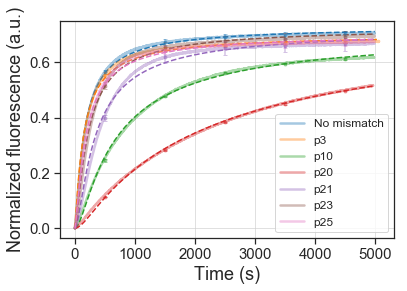

In [31]:
#average across the three replicates
sns.set(style="ticks")
plt.figure()
labels = ['No mismatch', 'p3', 'p10', 'p20', 'p21', 'p23', 'p25']
colorset = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
toehold_lengths = [nomut, mut_p3, mut_p10, mut_p20, mut_p21, mut_p23, mut_p25]
counter=0

#loop through the TMSD experiments
for ind, th_len in enumerate(toehold_lengths):
    
    #establish empty matrices for time, the initial signal, and the fluorescence over time
    time = np.empty((len(th_len[:, 0]), len(toehold_lengths)))
    fluor = np.empty((len(th_len[:, 0]), len(toehold_lengths)))
    timeind = [501,1500,2502,3501,4500]
    
    #fill the matrices the with the data for the TMSD experiments
    time[:, ind] = th_len[:,0]
    fluor[:, ind] = th_len[:,1:].mean(axis = 1)
    #fluor[:, ind] = th_len[:,2]
    
    timeindex = [np.where(time[:, ind]  == i)[0][0] for i in timeind]
    FAM_decay_time = FAM_decay[:, 0].tolist()
    time_time = time[:, ind].tolist()
    
    #set the start time to the time at which experiment of interest starts or the positive control experiment starts (whichever starts later)
    if FAM_decay[0, 0] <= time[0, ind]:     
        start_time = FAM_decay_time.index(time[0, ind])
        #set the end time to the time at which the experiment of interest ends or the positive control experiment ends (whichever ends earlier)
        if FAM_decay[-1, 0] >= time[-1, ind]:
            molar_fluor = np.empty((len(th_len[:, 0]), len(toehold_lengths)))
            end_time = FAM_decay_time.index(time[-1, ind])
            molar_fluor[:, ind] = (np.subtract(fluor[:, ind], fluor[0, ind]))/(np.subtract(FAM_decay[start_time:end_time+1, 1], fluor[0, ind]))
            time_molar = np.subtract(time[:, ind], time[0, ind])
            
            # calculate std
            std_all = []
            std_all.append(np.subtract(th_len[:,1], th_len[0,1])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[0,1])))            
            std_all.append(np.subtract(th_len[:,2], th_len[0,2])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[0,2])))
            std_all.append(np.subtract(th_len[:,3], th_len[0,3])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[0,3])))
            std_array = [np.array(std_all).std(axis=0)[i] for i in timeindex]
            
        else:
            molar_fluor = np.empty((len(FAM_decay[:, 0]) - start_time, len(toehold_lengths)))
            end_time = time_time.index(FAM_decay[-1, 0])
            molar_fluor[:, ind] = (np.subtract(fluor[:end_time+1, ind], fluor[0, ind]))/(np.subtract(FAM_decay[start_time:, 1], fluor[0, ind]))
            time_molar = np.subtract(time[:end_time + 1, ind], time[0, ind])
            
            # calculate std
            std_all = []
            std_all.append(np.subtract(th_len[:end_time+1,1], th_len[0,1])/(np.subtract(FAM_decay[start_time:, 1], th_len[0,1])))
            std_all.append(np.subtract(th_len[:end_time+1,2], th_len[0,2])/(np.subtract(FAM_decay[start_time:, 1], th_len[0,2])))
            std_all.append(np.subtract(th_len[:end_time+1,3], th_len[0,3])/(np.subtract(FAM_decay[start_time:, 1], th_len[0,3])))
            std_array = [np.array(std_all).std(axis=0)[i] for i in timeindex]
            
    #set the start time to the time at which experiment of interest starts or the positive control experiment starts (whichever starts later)
    else: 
        start_time = time_time.index(FAM_decay[0, 0])
        #set the end time to the time at which the experiment of interest ends or the positive control experiment ends (whichever ends earlier)
        if FAM_decay[-1, 0] >= time[-1, ind]:
            molar_fluor = np.empty((len(th_len[:, 0]) - start_time, len(toehold_lengths)))
            end_time = FAM_decay_time.index(time[-1, ind])
            molar_fluor[:, ind] = (np.subtract(fluor[start_time:, ind], fluor[start_time, ind]))/(np.subtract(FAM_decay[start_time:end_time+1, 1], fluor[start_time, ind]))
            time_molar = np.subtract(time[start_time:, ind], time[start_time, ind])
            
            # calculate std
            std_all = []
            std_all.append(np.subtract(th_len[start_time:,1], th_len[start_time,1])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[start_time,1])))
            std_all.append(np.subtract(th_len[start_time:,2], th_len[start_time,2])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[start_time,2])))
            std_all.append(np.subtract(th_len[start_time:,3], th_len[start_time,3])/(np.subtract(FAM_decay[start_time:end_time+1, 1], th_len[start_time,3])))
            std_array = [np.array(std_all).std(axis=0)[i] for i in timeindex]
        else:
            molar_fluor = np.empty((len(FAM_decay[:, 0]), len(toehold_lengths)))
            end_time = time_time.index(FAM_decay[-1, 0])
            molar_fluor[:, ind] = (np.subtract(fluor[start_time:end_time+1, ind], fluor[start_time, ind]))/(np.subtract(FAM_decay[start_time:, 1], fluor[start_time, ind])) 
            time_molar = np.subtract(time[start_time:end_time+1, ind], time[start_time, ind])
            
            # calculate std
            std_all = []
            std_all.append(np.subtract(th_len[start_time:end_time+1,1], th_len[start_time,1])/(np.subtract(FAM_decay[start_time:, 1], th_len[start_time,1])))
            std_all.append(np.subtract(th_len[start_time:end_time+1,2], th_len[start_time,2])/(np.subtract(FAM_decay[start_time:, 1], th_len[start_time,2])))
            std_all.append(np.subtract(th_len[start_time:end_time+1,3], th_len[start_time,3])/(np.subtract(FAM_decay[start_time:, 1], th_len[start_time,3])))
            std_array = [np.array(std_all).std(axis=0)[i] for i in timeindex]
    
    #fit the experimental data to the bimolecular model using numerical integration 
    popt, pcov = fit_TMSD(time_molar, molar_fluor[:, ind])
    print(labels[ind])
    print('keff = ', popt[0])
    print('alpha = ', popt[1])
    print(pcov)
    #determine one standard deviation errors for the parameters 
    perr = np.sqrt(np.diag(pcov))
    print(perr)
    TMSD_sol = solve_TMSD(time_molar, *popt)
    
    #plot the numerical integration and the fits
    if ind in range(7):
        plt.plot(time_molar, molar_fluor[:, ind], color = colorset[counter],linewidth = 2.5, label = labels[ind],alpha=0.4)
        plt.errorbar(timeind, [molar_fluor[:, ind][i] for i in timeindex], yerr=std_array,fmt=".",color = colorset[counter],capsize=2,alpha=0.4)
        
        if ind == 0:
            plt.plot(time_molar, TMSD_sol, '--', label = 'Fit',color = colorset[counter])
        else: 
            plt.plot(time_molar, TMSD_sol, '--',color = colorset[counter])
        counter += 1

ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
ax.grid(alpha = 0.6)

handles = [handles[0], handles[2], handles[3], handles[4], handles[5], handles[6],handles[7]]
labels = [labels[0], labels[2], labels[3], labels[4], labels[5], labels[6],labels[7]]

ax.legend(handles,labels,loc='lower right',fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Time (s)', fontsize = 18, fontname = 'Arial')
plt.ylabel('Normalized fluorescence (a.u.)', fontsize = 18, fontname = 'Arial')
#plt.savefig('./figs/mut_all.svg')
plt.show()